# FEATURE VISUALIZATION

### Essential libraries

In [1]:
import torch
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


### Load the pre-trained VGG16 model

In [2]:
model = models.vgg16(pretrained=True).to('cuda')
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 118MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
# Define the target class (Hen)
target_class = 8

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Inverse normalization for visualization
inv_normalize = transforms.Compose([
    transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                         std=[1/0.229, 1/0.224, 1/0.225]),
    transforms.ToPILImage()
])

# Initialize a random image
image = torch.randn(1, 3, 224, 224, requires_grad=True, device='cuda')

### First part

Step 0/300, Loss: -0.7533672451972961
Step 50/300, Loss: -391.7619934082031
Step 100/300, Loss: -539.3070068359375
Step 150/300, Loss: -610.879150390625
Step 200/300, Loss: -657.6040649414062
Step 250/300, Loss: -692.9869384765625


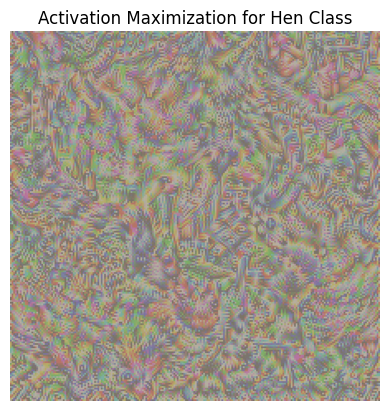

In [4]:
# Define the optimizer
optimizer = optim.Adam([image], lr=0.1)

# Optimization loop
num_steps = 300
for step in range(num_steps):
    optimizer.zero_grad()
    output = model(image)
    target = output[0, target_class]
    loss = -target
    loss.backward()
    optimizer.step()

    # Clamp the image values to be in a valid range
    with torch.no_grad():
        image.clamp_(0, 1)

    if step % 50 == 0:
        print(f'Step {step}/{num_steps}, Loss: {loss.item()}')

# Convert the optimized image to a format suitable for visualization
optimized_image = image.detach().cpu().squeeze()
optimized_image = inv_normalize(optimized_image)
optimized_image = np.array(optimized_image)

# Display the optimized image
plt.imshow(optimized_image)
plt.title('Activation Maximization for Hen Class')
plt.axis('off')
plt.show()


### Part two

Step 0/3000, Loss: 0.6931571960449219
Step 500/3000, Loss: -112.0572738647461
Step 1000/3000, Loss: -244.24734497070312
Step 1500/3000, Loss: -348.23321533203125
Step 2000/3000, Loss: -415.6432189941406
Step 2500/3000, Loss: -478.62811279296875
Step 0/3000, Loss: 1.235493540763855
Step 500/3000, Loss: -95.58110046386719
Step 1000/3000, Loss: -248.01593017578125
Step 1500/3000, Loss: -345.2403259277344
Step 2000/3000, Loss: -435.7851257324219
Step 2500/3000, Loss: -468.6064453125
Step 0/3000, Loss: 0.6055221557617188
Step 500/3000, Loss: -95.97158813476562
Step 1000/3000, Loss: -216.3922882080078
Step 1500/3000, Loss: -326.6859130859375
Step 2000/3000, Loss: -388.48553466796875
Step 2500/3000, Loss: -462.7837219238281
Step 0/3000, Loss: 0.9206221103668213
Step 500/3000, Loss: -107.17897033691406
Step 1000/3000, Loss: -274.1445617675781
Step 1500/3000, Loss: -369.1884460449219
Step 2000/3000, Loss: -458.4836120605469
Step 2500/3000, Loss: -499.8597717285156
Step 0/3000, Loss: 1.315887689

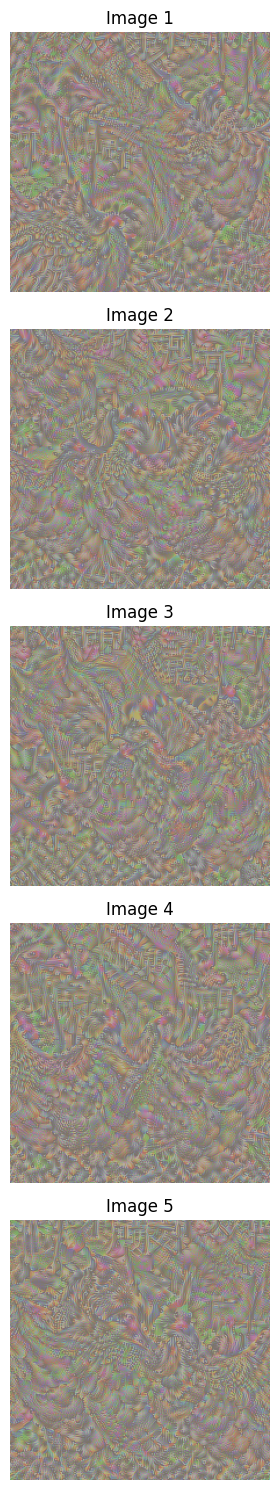

In [6]:
target_class = 8

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Inverse normalization for visualization
inv_normalize = transforms.Compose([
    transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                         std=[1/0.229, 1/0.224, 1/0.225]),
    transforms.ToPILImage()
])

# Total Variation Regularization
def total_variation_loss(img):
    tv_h = torch.pow(img[:,:,1:,:] - img[:,:,:-1,:], 2).sum()
    tv_w = torch.pow(img[:,:,:,1:] - img[:,:,:,:-1], 2).sum()
    return (tv_h + tv_w)

# Random shift
def random_shift(img, max_shift=5):
    _, _, h, w = img.size()
    shift_x, shift_y = np.random.randint(-max_shift, max_shift+1, size=2)
    img = torch.roll(img, shifts=(shift_x, shift_y), dims=(2, 3))
    return img

# DeepDream regularization
def deepdream_loss(img):
    kernel = torch.tensor([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, 36, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]], dtype=torch.float32)
    kernel = kernel.unsqueeze(0).unsqueeze(0) / 256.0
    kernel = kernel.repeat(3, 1, 1, 1).to(img.device)
    img = torch.nn.functional.conv2d(img, kernel, padding=2, groups=3)
    return torch.sum(torch.pow(img, 2))

# Generate and optimize image
def generate_image(target_class, num_steps=3000, lr=0.001, tv_weight=1e-6, l2_weight=1e-4, deepdream_weight=1e-4, max_shift=5):
    image = torch.randn(1, 3, 224, 224, requires_grad=True, device='cuda')

    optimizer = optim.AdamW([image], lr=lr)

    for step in range(num_steps):
        optimizer.zero_grad()

        # Random shift
        shifted_image = random_shift(image, max_shift=max_shift)

        # Forward pass
        output = model(shifted_image)
        target = output[0][target_class]

        # Loss
        loss = -target + tv_weight * total_variation_loss(shifted_image) + l2_weight * torch.norm(image) + deepdream_weight * deepdream_loss(shifted_image)
        loss.backward()
        optimizer.step()

        # Clamp the image values to be in a valid range
        with torch.no_grad():
            image.clamp_(0, 1)

        if step % 500 == 0:
            print(f'Step {step}/{num_steps}, Loss: {loss.item()}')

    return image

# Generate 5 images and display
num_images = 5
images = []
for i in range(num_images):
    image = generate_image(target_class)
    images.append(image.detach().cpu().squeeze())

fig, axs = plt.subplots(num_images, 1, figsize=(10, 15))
for i, img in enumerate(images):
    optimized_image = inv_normalize(img)
    optimized_image = np.array(optimized_image)

    axs[i].imshow(optimized_image)
    axs[i].set_title(f'Image {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()
